In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import numpy as np
np.random.seed(seed=0)
n_samples = 300
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(0))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

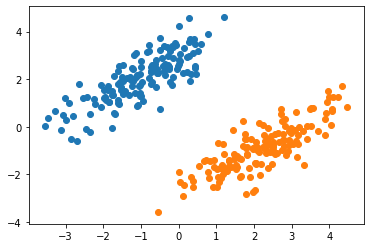

In [3]:
plt.scatter(f0[:, 0], f0[:, 1])
plt.scatter(f1[:, 0], f1[:, 1])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# 【問題1】不純度を求める関数
ノード の ジニ不純度 を計算する関数を作成してください。ノード 
tに対するジニ不純度 I(t)
 は以下の数式で求まります。クラスが混じり合っているほどジニ不純度は高くなります。

In [5]:
1 - ((15/45)**2+ (15/45)**2 + (15/45)**2)

0.6666666666666667

In [6]:
def gini_s(div):
    """
    ジニ係数求める式
    ーーーーーーーーーーーーー
    """
    #　データの総数
    m = len(div[0])+ len(div[1])
    score=0
    for i in range(len(div)):
        try:
            p = len(div[i])/ m
            score += p**2
        except ZeroDivisionError:
            score += 0
        gini = 1- score
            
    return gini

# 【問題2】情報利得を求める関数
次に、ノード間の 情報利得 を計算する関数を作成してください。問題1で作成したジニ不純度 
I(t)を計算する関数を呼び出して使います。情報利得IG
は以下の数式で求まります。うまく分けられている時ほど情報利得は大きくなります。

In [7]:
div_X = [X_train[X_train[:, 0] >= X_train[0,0]], X_train[X_train[:, 0] < X_train[0,0]]]
for i in range(len(div_X)):
    if i == 0:
        X1 = div_X[i][div_X[i][:,i] >= div_X[i][1,0]]
        X2 = div_X[i][div_X[i][:,i] < div_X[i][1,0]]
    else:
        Y1 = div_X[i][div_X[i][:,i] >= div_X[i][1,0]]
        Y2 = div_X[i][div_X[i][:,i] < div_X[i][1,0]]

# 左ノード
X = [X1, X2]
# 右ノード
Y = [Y1, Y2]

In [8]:
def information_profit(P, left, right):
    n_all = len(P[0])+ len(P[1]) 
    I_P = gini_s(P)
    I_left = gini_s(left)
    left_all = len(left[0]) + len(left[1])
    I_right = gini_s(right)
    right_all = len(right[0]) + len(right[1])  

    lef = (left_all / n_all ) * I_left
    rig = (right_all / n_all) * I_right
    GI = I_P - (lef + rig)
    return GI

In [9]:
information_profit(div_X, X,Y)

0.1148350694444443

# 【問題3】学習
空間の分割を行い、決定木のグラフを生成するコードを作成してください。今は深さ1の決定木なので、分割を1回だけ行います。ここでグラフを生成するとは、1回の分割の際の条件としてどの特徴量がいくつ以上の時とするかを求めるということです。


訓練データに対して全ての組み合わせの分割を行い、その中でノード間の情報利得が最大となる分割をそのノードの分割基準として記録します。


クラスが混ざらない不純度が0のノード、または指定された深さのノードが 葉ノード となります。葉ノードにはクラスを記録しておき、これを推定時に分類するクラスとします。クラスが混ざらない場合はそのままのクラスを記録し、混ざっている場合は多数決により決めます。

In [10]:
GI_max = 0

X_idx = X_train.shape[1]
feature_idx = 0
for i in range(X_idx):
    count = 0
    value = X_train[:, i]
    for val in value:
        div_X = [X_train[X_train[:, i]>=val],X_train[X_train[:, i] < val]]
        L0, L1 = [div_X[0][div_X[0][:, i]>=val],div_X[0][div_X[0][:, i] < val]]
        R0, R1 = [div_X[1][div_X[1][:, i]>=val],div_X[1][div_X[1][:, i] < val]]
        L = L0, L1
        R = R0, R1 
        
        GI = information_profit(div_X, L, R)
        if GI_max < GI:
            GI_max = GI
            best_thrs = val
            best_f = count
        count += 1
        
    feature_idx += 1
print("[ベストGIスコア]:",GI_max,"[ベストスコアの特徴量]：", best_thrs, "[ベストスコアのインデックス]：",best_f)

[ベストGIスコア]: 0.5 [ベストスコアの特徴量]： 0.5069842444056742 [ベストスコアのインデックス]： 56


In [11]:
X_train[239]

array([ 2.99630953, -0.2720525 ])

In [12]:
div_X[0][:, 0]

array([-1.16513883, -0.53695299,  3.39914935, -2.43460308, -1.21773886,
       -1.7604608 , -1.69044419,  0.77721928, -0.17684562,  2.62947558,
       -1.15875379, -1.72731635, -1.70237362,  0.23534918, -0.74353635,
       -0.39138336,  3.48849579, -0.57406501, -2.54738211,  0.43738711,
       -1.50642737,  0.59835232, -0.01976388, -1.13769654, -2.80006782,
       -1.23054341, -0.25744056, -0.44011905,  4.08352182,  0.50698424,
        2.93889877, -1.10375132,  0.2270352 , -1.4641828 , -0.26964576,
        2.74112327, -2.63714503, -2.91877408, -0.95596327,  0.27362647,
        0.31369184, -1.00944756,  0.14206286,  0.27578332, -1.61844165,
        3.99770982,  2.70709974,  0.12582021, -0.57337132, -1.5615169 ,
       -1.03368808, -0.82930895, -3.47487306,  2.82171675,  3.11922688,
       -1.585383  , -1.48113223, -0.5017044 ,  0.46861035, -1.57470303,
       -3.29244287, -1.44217612, -0.37124062, -1.99259968,  3.6916582 ,
       -0.2835204 ,  0.0162981 , -1.10871442,  3.30006142, -0.99

# 【問題4】推定
推定する仕組みを実装してください。ScratchDecesionTreeClassifierDepth1クラスの雛形に含まれるpredictメソッドに書き加えてください。


入力されたデータの値を学習した条件で判定していき、どの葉ノードに到達するかを見ます。葉ノードにはクラスが記録されているので、これが推定値となります。

In [13]:
def predict(X):
        """
        決定木分類器を使いラベルを推定する
        """
        pred = []
        c = X.shape[0]
        for i in range(c):
            if X[i][0] >= best_thrs:
                pred.append(1)
            else:
                pred.append(0)
        return np.array(pred)

In [14]:
predict(X_val)

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

# 最終的なクラス

In [83]:
class ScratchDecesionTreeClassifierDepth1():
    """
    深さ1の決定木分類器のスクラッチ実装

    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        """
        # ラベルデータ総数
        self.m = len(X)
        self.GI_max = 0

        X_idx = X_train.shape[1]
        feature_idx = 0
        for i in range(X_idx):
            count = 0
            value = X_train[:, i]
            for val in value:

                div_X = [X_train[X_train[:, i]>=val],X_train[X_train[:, i] < val]]
                L0, L1 = [div_X[0][div_X[0][:, i]>=val],div_X[0][div_X[0][:, i] < val]]
                R0, R1 = [div_X[1][div_X[1][:, i]>=val],div_X[1][div_X[1][:, i] < val]]
                
                # 左ノードのデータ
                L = L0, L1
                #右ノードのデータ
                R = R0, R1
                
                # 情報利得求める
                GI = self._information_profit(div_X, L, R)
                
                # 情報利得が最大となる場合の記録更新式
                if self.GI_max < GI:
                    self.GI_max = GI
                    self.best_thrs = val
                    self.best_f = count
                    
                count +=1
            feature_idx += 1   
        
        print("[ベストGIスコア]:",GI_max,"[ベストスコアの特徴量]：", best_thrs, "[ベストスコアのインデックス]：",best_f)
         
        
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()


    def _gini_s(self, div):
        """
        ジニ係数求める式
        ーーーーーーーーーーーーー
        div: 閾値で判定された分割データ
        """
        #　データの総数
        m = len(div[0])+ len(div[1])
        
        #ジニ係数記録用
        score=0
        
        for i in range(len(div)):
            #データ０個の場合の例外処理 :0の場合はジニ係数０とする
            try:
                p = len(div[i])/ m
                score += p**2
            except ZeroDivisionError:
                score += 0
            gini = 1- score
                
        return gini
    

    def _information_profit(self, P, left, right):
        """
        情報利得求める式
        ーーーーーーーーーーーーー
        P: 親ノード
        left：左ノード
        right　右ノード
        """
        n_all = len(P[0])+ len(P[1]) 
        I_P = self._gini_s(P)
        I_left = self._gini_s(left)
        left_all = len(left[0]) + len(left[1])
        I_right = self._gini_s(right)
        right_all = len(right[0]) + len(right[1])  

        lef = (left_all / n_all ) * I_left
        rig = (right_all / n_all) * I_right
        GI = I_P - (lef + rig)
        return GI
    
    
    def predict(self, X):
            """
            決定木分類器を使いラベルを推定する
            """
            # 予測データ格納
            pred = []
            
            # 特徴量の数 
            c = X.shape[0]
            
            # 繰り返し処理で特徴量の閾値比較
            for i in range(c):
                if X[i][0] >= self.best_thrs:
                    pred.append(0)
                else:
                    pred.append(1)
                    
            return np.array(pred)

# 【問題5】学習と推定
機械学習スクラッチ入門のSprintで用意したシンプルデータセット2の2値分類に対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。


AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [84]:
SDTC = ScratchDecesionTreeClassifierDepth1()

In [85]:
SDTC.fit(X_train, y_train)

[ベストGIスコア]: 0 [ベストスコアの特徴量]： 0.5285833901961039 [ベストスコアのインデックス]： 11


In [86]:
y_pred = SDTC.predict(X_val)
np.argmax(np.bincount(y_pred))


1

In [87]:
from sklearn.metrics import accuracy_score

In [88]:
accuracy_score(y_val, y_pred)

0.9833333333333333

In [89]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(max_depth=1)
DTC.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [90]:
tree_pred = DTC.predict(X_val)
accuracy_score(y_val, tree_pred)

0.9833333333333333

# 【問題6】決定領域の可視化
決定領域を可視化してください。

In [91]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['1', '-1']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    print(mesh.shape)
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

(823374, 2)


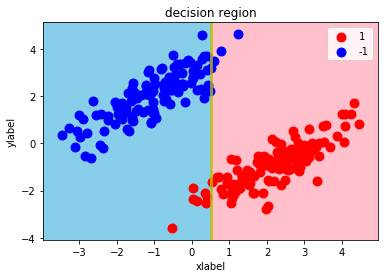

In [92]:
decision_region(X_train, y_train, SDTC)

(823374, 2)


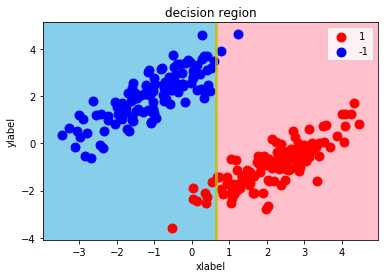

In [93]:
decision_region(X_train, y_train, DTC)

# 【問題7】（アドバンス課題）深さ2の決定木分類器クラスの作成
深さが2の決定木分類器のクラスScratchDecesionTreeClassifierDepth2を作成してください。


深さ2とは空間の分割を2回行うことを指します。

# 【問題8】（アドバンス課題）深さに制限のない決定木分類器クラスの作成
深さに制限のない決定木分類器のクラスScratchDecesionTreeClassifierDepthInfを作成してください。


任意の深さを指定できるようにするとともに、指定しない場合は全ての葉ノードがジニ不純度0となるまで続けられるよう

In [98]:
# 特徴量分の閾値求める
self_GI = []
X_idx = X_train.shape[1]
for i in range(X_idx):
    split_data(X_train, i)
    self_GI.append([GI_max, best_thrs, best_f])       
    feature_idx += 1

In [99]:
div_X = [X_train[X_train[:, 0]>=self_GI[0][2]],X_train[X_train[:, ] < self_GI[0][2]]]

In [100]:
def gini_s2(div):
    """
    ジニ係数求める式
    ーーーーーーーーーーーーー
    """
    #　データの総数
    m = len(div[0])
    score=0
    for i in range(len(div)):
        try:
            p = len(div[i])/ m
            score += p**2
        except ZeroDivisionError:
            score += 0
        gini = 1- score
            
    return gini

In [41]:
def information_profit2(P, left, right):
    n_all = len(P[0])
    I_P = gini_s2(P)
    I_left = gini_s2(left)
    left_all = len(left[0])
    I_right = gini_s2(right)
    right_all = len(right[0])

    lef = (left_all / n_all ) * I_left
    rig = (right_all / n_all) * I_right
    GI = I_P - (lef + rig)
    return GI

In [44]:
GI_max = 0
count = 0
value = X_train[:, 1]
for val in value:
    div_X = [X_train[X_train[:, 1]>=val],X_train[X_train[:, 1] < val]]
    #L0, L1 = [div_X[0][div_X[0][:, 1]>=val],div_X[0][div_X[0][:, 1] < val]]
    #R0, R1 = [div_X[1][div_X[1][:, 1]>=val],div_X[1][div_X[1][:, 1] < val]]
    L, R = div_X
    print(R[0])
    
    GI = information_profit2(X_train, L, R)
    if GI_max < GI:
        GI_max = GI
        best_thrs = val
        best_f = count

    count += 1
print(GI_max, best_thrs, best_f)


[3.39914935 0.02889014]
[-1.16513883  1.40174924]
[ 0.38941521 -2.26075336]
[3.39914935 0.02889014]
[-0.53448569 -3.58123976]
[ 0.38941521 -2.26075336]
[-1.16513883  1.40174924]
[ 0.38941521 -2.26075336]
[3.39914935 0.02889014]
[ 0.38941521 -2.26075336]
[ 0.38941521 -2.26075336]
[3.39914935 0.02889014]
[-1.16513883  1.40174924]
[-1.16513883  1.40174924]
[ 0.38941521 -2.26075336]
[ 0.38941521 -2.26075336]
[ 0.38941521 -2.26075336]
[ 0.38941521 -2.26075336]
[ 0.38941521 -2.26075336]
[ 0.38941521 -2.26075336]
[ 0.38941521 -2.26075336]
[-1.16513883  1.40174924]
[3.39914935 0.02889014]
[ 0.38941521 -2.26075336]
[-1.16513883  1.40174924]
[ 0.38941521 -2.26075336]
[-1.16513883  1.40174924]
[ 0.38941521 -2.26075336]


IndexError: index 0 is out of bounds for axis 0 with size 0

### うまくいかないので再度最初からコードを考える
Xだけでなくyも活用しgini係数など計算する

In [102]:
# ジニ関数
def _gini_func(y):
    gini = 0
    y_uni = np.unique(y)
    for y_idx in y_uni:
        gini = (sum(y==y_idx) / y.shape[0])**2
    return gini

In [103]:
_gini_func(y_train)

0.23765624999999999

In [105]:
def _infomation_gini(y_p, y_l, y_r):
    parent = _gini_func(y_p)
    left = _gini_func(y_l)
    right = _gini_func(y_r)
    return parent - (y_l.shape[0] / y_p.shape[0]) * left - (y_r.shape[0] / y_p.shape[0]) * right

In [143]:
def _division(X, y):
    info_ginin = 0
    feature = 0
    threshold = 0
    #　サンプル数
    n_samples = X.shape[0]
    # ラベルの種類
    labels = np.unique(y)
    
    # ラベルが1になったらreturn
    if len(labels) == 1:
        label = y[0]
        return
    
    # 情報利得を計算
    for feature_idx in range(X.shape[1]):
        for threshold in X[:, feature_idx]:
            y_div = y[X[:, feature_idx] <= threshold], y[X[:, feature_idx] > threshold]
            y_left, y_right = y_div
            
            info_gini = _infomation_gini(y, y_left, y_right)
            
            # 情報利得が大きければ都度更新
            if info_ginin < info_gini:
                info_ginin = info_gini
                feature = feature_idx
                threshold = threshold  
    return info_gini, feature, threshold

In [155]:
info_gini, feature, threshold = _division(X_train, y_train)

In [158]:
# 左の子ノード用に、データ分割
X_left = X_train[X_train[:, feature] <= threshold]
y_left = y_train[X_train[:, feature] <= threshold]

# 右の子ノード用に、データ分割
X_right = X_train[X_train[:, feature] > threshold]
y_right = y_train[X_train[:, feature] > threshold]

In [101]:
class Node:
    """
    決定木分類器内で呼ばれるノードクラス
    
    """
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.depth = None
        self.label = None
        self.left = None
        self.right = None
        self.info_gain = 0.0
        self.feature = None
        self.threshold = None
    
    def divide(self, X, y, depth, total_labels):
        # ノードに渡されたデータのサンプル数、ラベル種、深さをこの時点で格納
        self.n_samples = X.shape[0]
        self.labels = np.unique(y)
        self.depth = depth
        # ラベルが1になったらreturn
        if len(self.labels) == 1:
            self.label = y[0]
            return
        
        # ラベルが2種類以上あったら最多ラベルをこのノードのラベルとする
        unique, count = np.unique(y, return_counts=True)
        y_count_dict = dict(zip(unique, count))
        self.label = max(y_count_dict, key=y_count_dict.get)
        
        # 情報利得を計算
        for column in range(X.shape[1]):
            for threshold in X[:, column]:
                y_left = y[X[:, column] <= threshold]
                y_right = y[X[:, column] > threshold]
                info_gain_calculated = self._gini_func(y, y_left, y_right) # スクラッチ関数
                # 情報利得が大きければ都度更新
                if self.info_gain < info_gain_calculated:
                    self.info_gain = info_gain_calculated
                    self.feature = column
                    self.threshold = threshold        
                    
        # 情報利得がゼロのままだったら終了
        if self.info_gain == 0.0:
            return
        
        # max_depthまで行ったら終了
        if self.depth == self.max_depth:
            return
        
        # 左の子ノード用に、データ割付と新たなノード生成を行い、関数再帰させる
        X_left = X[X[:, self.feature] <= self.threshold]
        y_left = y[X[:, self.feature] <= self.threshold]
        self.left = Node(self.max_depth)
        # 割付したデータ、+1した深さ、訓練データのラベル種を渡す
        self.left.divide(X_left, y_left, self.depth+1, total_labels)
        
        # 右の子ノード用に、データ割付と新たなノード生成を行い、関数再帰させる
        X_right = X[X[:, self.feature] > self.threshold]
        y_right = y[X[:, self.feature] > self.threshold]
        self.right = Node(self.max_depth)
        # 割付したデータ、+1した深さ、訓練データのラベル種を渡す
        self.right.divide(X_right, y_right, self.depth+1, total_labels)
        
        
        def _info_gain_func(self, y_parent, y_left, y_right):
            self.gini_func(y_parent)
            self.gini_func()
            return self._gini_func(y_parent) - (y_left.shape[0] / y_parent.shape[0]) * self._gini_func(y_left) - (y_right.shape[0] / y_parent.shape[0]) * self._gini_func(y_right)

        def _gini_func(self, y):
            gini = 1
            y_species = np.unique(y)
            for y_i in y_species:
                gini -= (sum(y==y_i) / y.shape[0])**2
            return gini

array([0, 1])